# CrowdTruth for Sparse Multiple Choice Tasks: Event Extraction

In [1]:
import pandas as pd
file_name = "f1321915_events_allmotivation"
test_data = pd.read_csv("../../data/pilot_crowd_data/raw_data/" + file_name + ".csv")
test_data.head()

,_unit_id,_created_at,_id,_started_at,_tainted,_channel,_trust,_worker_id,_country,_region,...,hiddeninput_gold,lowercase_sentence,notpossible_gold,original_sentence,possible_gold,processed_sentence,selectedtags_desc_gold,sentence,sentence_id,tokens
0,2015653573,11/18/2018 19:32:48,4259984460,11/18/2018 19:32:33,False,prodege,1,4316379,CAN,ON,...,NaN,former president nicolas sarkozy was informed ...,NaN,NaN,NaN,NaN,NaN,Former President Nicolas Sarkozy was informed ...,0,47
1,2015653573,11/18/2018 19:45:18,4260010815,11/18/2018 19:44:40,False,prodege,1,33565158,USA,TX,...,NaN,former president nicolas sarkozy was informed ...,NaN,NaN,NaN,NaN,NaN,Former President Nicolas Sarkozy was informed ...,0,47
2,2015653573,11/18/2018 22:14:19,4260263055,11/18/2018 22:14:04,False,clixsense,1,22970449,GBR,NaN,...,NaN,former president nicolas sarkozy was informed ...,NaN,NaN,NaN,NaN,NaN,Former President Nicolas Sarkozy was informed ...,0,47
3,2015653573,11/18/2018 22:37:39,4260292639,11/18/2018 22:37:14,False,elite,1,44242038,USA,FL,...,NaN,former president nicolas sarkozy was informed ...,NaN,NaN,NaN,NaN,NaN,Former President Nicolas Sarkozy was informed ...,0,47
4,2015653573,11/18/2018 22:44:11,4260301298,11/18/2018 22:43:15,False,prodege,1,11131207,CAN,ON,...,NaN,former president nicolas sarkozy was informed ...,NaN,NaN,NaN,NaN,NaN,Former President Nicolas Sarkozy was informed ...,0,47


## Declaring a pre-processing configuration

The pre-processing configuration defines how to interpret the raw crowdsourcing input. To do this, we need to define a configuration class. First, we import the default CrowdTruth configuration class:

In [101]:
import crowdtruth
from crowdtruth.configuration import DefaultConfig

Our test class inherits the default configuration `DefaultConfig`, while also declaring some additional attributes that are specific to the Relation Extraction task:

* **`inputColumns`:** list of input columns from the .csv file with the input data
* **`outputColumns`:** list of output columns from the .csv file with the answers from the workers
* **`annotation_separator`:** string that separates between the crowd annotations in `outputColumns`
* **`open_ended_task`:** boolean variable defining whether the task is open-ended (i.e. the possible crowd annotations are not known beforehand, like in the case of free text input); in the task that we are processing, workers pick the answers from a pre-defined list, therefore the task is not open ended, and this variable is set to `False`
* **`annotation_vector`:** list of possible crowd answers, mandatory to declare when `open_ended_task` is `False`; for our task, this is the list of all relations that were given as input to the crowd in at least one sentence
* **`processJudgments`:** method that defines processing of the raw crowd data; for this task, we process the crowd answers to correspond to the values in `annotation_vector`

The complete configuration class is declared below:

In [102]:
class TestConfig(DefaultConfig):
    inputColumns = ["doc_id", "total_events_gold", "sentence", "lowercase_sentence", "sentence_id", "all_runs_events"]
    outputColumns = ["selectedtags_desc"]
    
    annotation_separator = ","
        
    # processing of a closed task
    open_ended_task = True
    
    def processJudgments(self, judgments):
        # pre-process output to match the values in annotation_vector
        for col in self.outputColumns:
            # transform to lowercase
            judgments[col] = judgments[col].apply(lambda x: str(x).lower())
            # remove square brackets from annotations
            judgments[col] = judgments[col].apply(lambda x: str(x).replace('[',''))
            judgments[col] = judgments[col].apply(lambda x: str(x).replace(']',''))
            # remove the quotes around the annotations
            judgments[col] = judgments[col].apply(lambda x: str(x).replace('"',''))
        return judgments

## Pre-processing the input data

After declaring the configuration of our input file, we are ready to pre-process the crowd data:

In [103]:
data_open, config = crowdtruth.load(
    file = "../../data/pilot_crowd_data/raw_data/" + file_name + ".csv",
    config = TestConfig()
)

data_open['judgments'].head()

INFO:root:Config loaded
INFO:root:Values not stored as dictionary


,output.selectedtags_desc,output.selectedtags_desc.count,output.selectedtags_desc.unique,submitted,started,worker,unit,duration,job
judgment,,,,,,,,,
4259984460,"{u'informed__37__45': 1, u'investigation__83__...",2,2,2018-11-18 19:32:48,2018-11-18 19:32:33,4316379,2015653573,15,../pilot_data/f1321915_events_allmotivation
4260010815,"{u'informed__37__45': 1, u'face__69__73': 1}",2,2,2018-11-18 19:45:18,2018-11-18 19:44:40,33565158,2015653573,38,../pilot_data/f1321915_events_allmotivation
4260263055,"{u'informed__37__45': 1, u'face__69__73': 1, u...",6,6,2018-11-18 22:14:19,2018-11-18 22:14:04,22970449,2015653573,15,../pilot_data/f1321915_events_allmotivation
4260292639,"{u'informed__37__45': 1, u'face__69__73': 1, u...",5,5,2018-11-18 22:37:39,2018-11-18 22:37:14,44242038,2015653573,25,../pilot_data/f1321915_events_allmotivation
4260301298,"{u'informed__37__45': 1, u'investigation__83__...",3,3,2018-11-18 22:44:11,2018-11-18 22:43:15,11131207,2015653573,56,../pilot_data/f1321915_events_allmotivation


## Computing the CrowdTruth metrics

The pre-processed data can then be used to calculate the CrowdTruth metrics:

In [104]:
results_open = crowdtruth.run(data_open, config)

INFO:root:1 iterations; max d= 1.0 ; wqs d= 0.433424206344; uqs d= 0.380209542157; aqs d= 0.0
INFO:root:2 iterations; max d= 0.183072509484 ; wqs d= 0.0538178728457; uqs d= 0.104996000911; aqs d= 0.0
INFO:root:3 iterations; max d= 0.0151564277858 ; wqs d= 0.00540585283826; uqs d= 0.00227625799749; aqs d= 0.0
INFO:root:4 iterations; max d= 0.00394785701155 ; wqs d= 0.000885486314389; uqs d= 0.00230137266274; aqs d= 0.0
INFO:root:5 iterations; max d= 0.000422301654294 ; wqs d= 0.000117314184373; uqs d= 3.28301802224e-05; aqs d= 0.0


`results` is a dict object that contains the quality metrics for sentences, events and crowd workers.

The **sentence metrics** are stored in `results["units"]`:

In [105]:
results_open["units"].head()

,duration,input.all_runs_events,input.doc_id,input.lowercase_sentence,input.sentence,input.sentence_id,job,output.selectedtags_desc,output.selectedtags_desc.annotations,output.selectedtags_desc.unique_annotations,worker,uqs,unit_annotation_score,uqs_initial,unit_annotation_score_initial
unit,,,,,,,,,,,,,,,
2015653573,72.45,informed__37__45###face__69__73###investigatio...,nyt_20130321_sarkozy,former president nicolas sarkozy was informed ...,Former President Nicolas Sarkozy was informed ...,0,../pilot_data/f1321915_events_allmotivation,"{u'investigation__83__96': 15, u'informed__37_...",68,6,20,0.648091,"{u'investigation__83__96': 0.82860921152, u'in...",0.558316,"{u'investigation__83__96': 0.75, u'informed__3..."
2015653574,44.00,denied__16__22###accepting__23__32###alleged__...,nyt_20130321_sarkozy,mr. sarkozy has denied accepting illegal campa...,Mr. Sarkozy has denied accepting illegal campa...,1,../pilot_data/f1321915_events_allmotivation,"{u'alleged__159__166': 12, u'denied__16__22': ...",58,5,20,0.624393,"{u'alleged__159__166': 0.717644208593, u'campa...",0.534776,"{u'alleged__159__166': 0.6, u'campaign__41__49..."
2015653575,48.20,called__41__47###decision__61__69###indicates_...,nyt_20130321_sarkozy,"mr. sarkozy s lawyer , thierry herzog , called...","Mr. Sarkozy 's lawyer , Thierry Herzog , calle...",2,../pilot_data/f1321915_events_allmotivation,"{u'believes__103__111': 11, u'no_event': 1, u'...",70,7,20,0.671783,"{u'believes__103__111': 0.714369456493, u'no_e...",0.488964,"{u'believes__103__111': 0.55, u'no_event': 0.0..."
2015653576,25.85,said__11__15###appeal__25__31###appeal .__25__33,nyt_20130321_sarkozy,the lawyer said he would appeal 0,The lawyer said he would appeal .,3,../pilot_data/f1321915_events_allmotivation,"{u'appeal__25__31': 14, u'appeal .__25__33': 6...",38,3,20,0.764369,"{u'appeal__25__31': 0.826494673437, u'appeal ....",0.718689,"{u'appeal__25__31': 0.7, u'appeal .__25__33': ..."
2015653577,32.40,ruling__4__10###mean__32__36###lost__60__64###...,nyt_20130321_sarkozy,the ruling does not necessarily mean that mr. ...,The ruling does not necessarily mean that Mr. ...,4,../pilot_data/f1321915_events_allmotivation,"{u'bid__81__84': 11, u'trial__162__167': 11, u...",69,6,20,0.658585,"{u'bid__81__84': 0.708964527043, u'trial__162_...",0.530221,"{u'bid__81__84': 0.55, u'trial__162__167': 0.5..."


The `uqs` column in `results["units"]` contains the **sentence quality scores**, capturing the overall workers agreement over each sentence. Here we plot its histogram:

Text(0,0.5,u'Sentences')

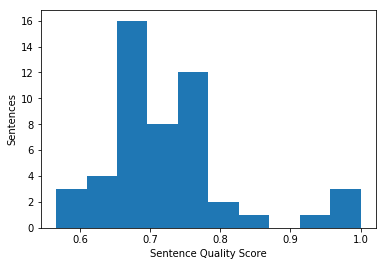

In [106]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(results_open["units"]["uqs"])
plt.xlabel("Sentence Quality Score")
plt.ylabel("Sentences")


The `unit_annotation_score` column in `results["units"]` contains the **sentence-relation scores**, capturing the likelihood that a relation is expressed in a sentence. For each sentence, we store a dictionary mapping each relation to its sentence-relation score.

In [107]:
results_open["units"]["unit_annotation_score"].head(10)

unit
2015653573    {u'investigation__83__96': 0.82860921152, u'in...
2015653574    {u'alleged__159__166': 0.717644208593, u'campa...
2015653575    {u'believes__103__111': 0.714369456493, u'no_e...
2015653576    {u'appeal__25__31': 0.826494673437, u'appeal ....
2015653577    {u'bid__81__84': 0.708964527043, u'trial__162_...
2015653578    {u'death__45__50': 0.663159456565, u'pleaded__...
2015653579    {u'no_event': 0.0113320941325, u'missing__66__...
2015653580    {u'learned__114__121': 0.734969235266, u'pulle...
2015653581    {u'detail__128__134': 0.501732692128, u'appear...
2015653582    {u'wanted__13__19': 0.747470064937, u'collect_...
Name: unit_annotation_score, dtype: object

The **worker metrics** are stored in `results["workers"]`:

In [108]:
results_open["workers"].head()

,duration,job,judgment,unit,wqs,wwa,wsa,wqs_initial,wwa_initial,wsa_initial
worker,,,,,,,,,,
3587109,9.895833,1,48,48,0.419018,0.606280,0.691129,0.367265,0.542298,0.677239
4316379,31.400000,1,50,50,0.334717,0.547328,0.611546,0.288518,0.486513,0.593034
6367365,81.000000,1,3,3,0.741327,0.844397,0.877937,0.715307,0.811477,0.881487
6377879,70.080000,1,50,50,0.775389,0.817584,0.948391,0.693488,0.738171,0.939469
6432269,62.333333,1,3,3,0.799450,0.836290,0.955948,0.739445,0.777708,0.950800


The `wqs` columns in `results["workers"]` contains the **worker quality scores**, capturing the overall agreement between one worker and all the other workers.

Text(0,0.5,u'Workers')

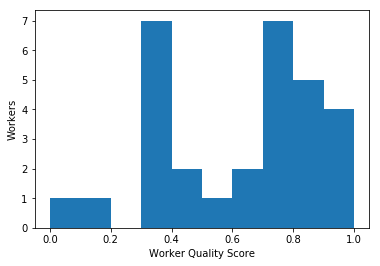

In [109]:
plt.hist(results_open["workers"]["wqs"])
plt.xlabel("Worker Quality Score")
plt.ylabel("Workers")

## Save crowd results in a csv file

In [110]:
rows = []
header = list(results_open["units"])
header.extend(["validated_event", "no_of_annotations", "validated_event_final_score", "validated_event_initial_score"])

rows.append(header)

for i in range(len(results_open["units"].index)):
    keys = []
    all_event_runs = results_open["units"]["input.all_runs_events"].iloc[i].lower().split("###")
    keys.extend(all_event_runs)
    keys.append("no_event")
    
    for j in range(len(keys)):
        row = list(results_open["units"].iloc[i])
        row.append(keys[j])
        row.append(results_open["units"]["output.selectedtags_desc"].iloc[i][keys[j].lower()])
        row.append(results_open["units"]["unit_annotation_score"].iloc[i][keys[j].lower()])
        row.append(results_open["units"]["unit_annotation_score_initial"].iloc[i][keys[j].lower()])
    
        rows.append(row)
        
        
import csv

with open('../pilot_data/' + file_name + '_units_open.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(rows)

## Comparison with Expert Annotations

In [111]:
# expert annotations in TempEval-3 Platinum dataset
import numpy as np
           
expert_data = pd.read_csv("../TempEval3-data/TE3-Platinum_events.csv")
crowd_data = pd.read_csv("../pilot_data/" + file_name + "_units_open.csv")
crowd_data["Experts"] = pd.Series(np.random.randn(len(crowd_data.index)), index=crowd_data.index)

for i in range(len(crowd_data.index)):
    subset = expert_data[(expert_data["Doc Id"].str.lower() == crowd_data["input.doc_id"].iloc[i].lower()) & (expert_data["Sentence Id"] == crowd_data["input.sentence_id"].iloc[i])]# & (str(str(expert_data["Lowercase Token"]) + "__" + str(expert_data["Start Offset"]) + "__" + str(expert_data["End Offset"])) == str(crowd_data["validated_event"].iloc[i]))]
    found = False
    for j in range(len(subset.index)):
        if str(str(subset["Lowercase Token"].iloc[j]) + "__" + str(subset["Start Offset"].iloc[j]) + "__" + str(subset["End Offset"].iloc[j])) == crowd_data["validated_event"].iloc[i]:
            found = True
    if found == True:
        crowd_data["Experts"].iloc[i] = 1
    else:
        crowd_data["Experts"].iloc[i] = 0
crowd_data.to_csv("../pilot_data/" + file_name + "_units_open.csv", index=False)    


In [112]:
import eval_crowd_results as eval_script

crowd = pd.read_csv('../pilot_data/' + file_name + '_units_open.csv')
eval_file = eval_script.compute_crowd_performance(crowd, "validated_event_final_score")
     
with open('../pilot_data/eval_' + file_name + '_units_open.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(eval_file)
    
eval_main = pd.read_csv("../pilot_data/eval_" + file_name + "_units_open.csv")
eval_main

,Thresh,TP,TN,FP,FN,Precision,Recall,Accuracy,F1-score
0,0.05,164,49,48,0,0.773585,1.000000,0.816092,0.872340
1,0.10,164,51,46,0,0.780952,1.000000,0.823755,0.877005
2,0.15,164,52,45,0,0.784689,1.000000,0.827586,0.879357
3,0.20,164,53,44,0,0.788462,1.000000,0.831418,0.881720
4,0.25,164,54,43,0,0.792271,1.000000,0.835249,0.884097
5,0.30,164,54,43,0,0.792271,1.000000,0.835249,0.884097
6,0.35,164,54,43,0,0.792271,1.000000,0.835249,0.884097
7,0.40,163,58,39,1,0.806931,0.993902,0.846743,0.890710
8,0.45,162,61,36,2,0.818182,0.987805,0.854406,0.895028
9,0.50,161,66,31,3,0.838542,0.981707,0.869732,0.904494
